<a href="https://colab.research.google.com/github/ljw-0108/medical-data-analysis/blob/main/08_multi_layer_perceptron_and_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 멀티 퍼셉트론 모델

## mnist 데이터셋 불러오기

In [1]:
# mnist 데이터셋 활용해서 멀티 퍼셉트론 모델 만들기
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
y_train.shape

(60000,)

In [4]:
x_test.shape

(10000, 28, 28)

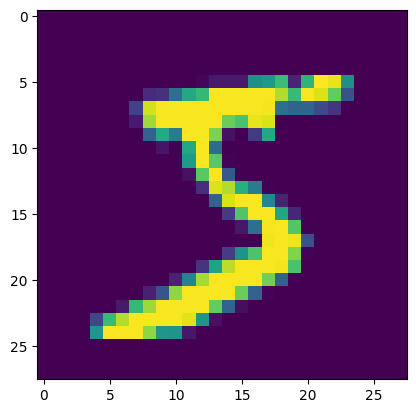

In [5]:
# 손글씨 이미지 출력
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [6]:
x_train.min(), x_train.max()

(np.uint8(0), np.uint8(255))

In [7]:
# 0~1값을 가질 때 딥러닝이 잘 동작하기 떄문에 표준화 진행
x_train = x_train/255
x_test = x_test/255

In [8]:
# 0~9까지의 y값 존재
y_train.min(), y_train.max()

(np.uint8(0), np.uint8(9))

In [9]:
# y값이 범주형이므로 원핫 인코딩 진행
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
# 멀티 퍼셉트론 모델 생성
from keras.models import Sequential
from keras.layers import Dense, Flatten
model = Sequential()
model.add(Flatten(input_shape=(28,28))) # 2차원을 1차원으로 변환
model.add(Dense(10, activation='softmax')) # 1차원입력을 10개로 분류

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1) # vervose : 정보를 상세히 출력, epoch, batch_size ppt 참고

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7296 - loss: 1.0485
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9007 - loss: 0.3780
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9103 - loss: 0.3276
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9166 - loss: 0.2983
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9209 - loss: 0.2875
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9230 - loss: 0.2782
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9239 - loss: 0.2705
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9252 - loss: 0.2680
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9262 - loss: 0.2654
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9284 - loss: 0.2624


In [13]:
model.evaluate(x_test, y_test, verbose=0) # loss, accuracy

[0.26547256112098694, 0.9269999861717224]

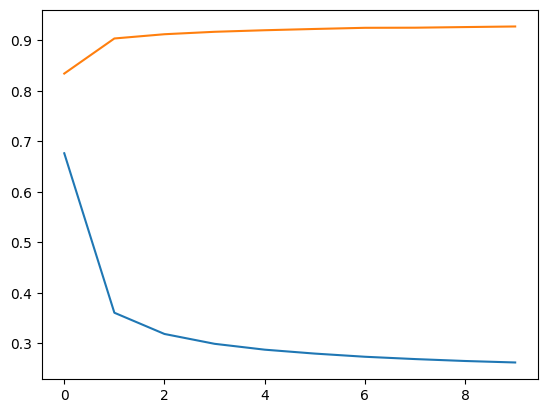

In [14]:
# plot을 통해 model의 loss, accuracy 변화 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

In [15]:
# 더 좋은 성능을 위해 100개씩의 은닉값을 가진 은닉층 2개 추가
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# vervose : 정보를 상세히 출력, epoch, batch_size ppt 참고
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8157 - loss: 0.6428 - val_accuracy: 0.9513 - val_loss: 0.1720
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9579 - loss: 0.1433 - val_accuracy: 0.9669 - val_loss: 0.1128
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9687 - loss: 0.1003 - val_accuracy: 0.9698 - val_loss: 0.1010
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9791 - loss: 0.0705 - val_accuracy: 0.9727 - val_loss: 0.0872
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9830 - loss: 0.0572 - val_accuracy: 0.9747 - val_loss: 0.0842
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9879 - loss: 0.0434 - val_accuracy: 0.9757 - val_loss: 0.0831
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9885 - loss: 0.0368 - val_accuracy: 0.9777 - val_loss: 0.0762
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9905 - loss: 0.0326 - val_accuracy: 0.

In [18]:
model.evaluate(x_test, y_test, verbose=0)

[0.08167318999767303, 0.9768000245094299]

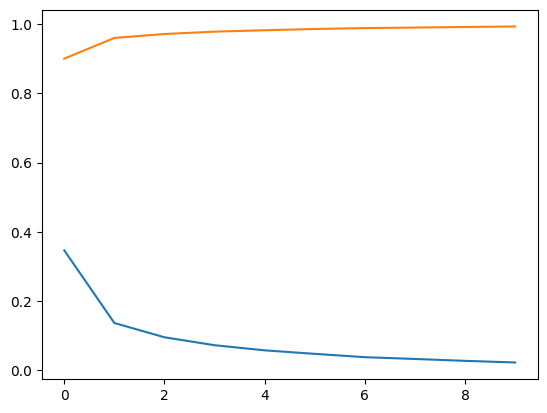

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

실습 1 : 위 학습 결과를 해석해보세요. 그리고 그 근거를 찾아보세요.
- 정확도가 향상되었다. 더 좋은 결과의 모델이다. 과소적합이다. 과대적합이다 등
- 정확도가 향상되었다.  loss가 감소하고 accuracy가 증가했기때문이다.

# CNN

In [20]:
# CNN에 필요한 레이어 추가
from keras.layers import Conv2D, MaxPooling2D

In [21]:
# 모델 생성
conv_model = Sequential()
conv_model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
conv_model.add(MaxPooling2D(pool_size=(2,2)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# convolution layer, max pooling layer 추가
conv_model.add(Conv2D(15, (3,3), activation='relu'))
conv_model.add(MaxPooling2D(pool_size=(2,2)))

In [23]:
# flatten and classification
conv_model.add(Flatten())
conv_model.add(Dense(64, activation='relu'))
conv_model.add(Dense(10, activation='softmax'))

In [24]:
# compile
conv_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
# 모델 학습
conv_history = conv_model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - accuracy: 0.8037 - loss: 0.6676 - val_accuracy: 0.9723 - val_loss: 0.0901
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 67ms/step - accuracy: 0.9738 - loss: 0.0856 - val_accuracy: 0.9824 - val_loss: 0.0583
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.9814 - loss: 0.0616 - val_accuracy: 0.9836 - val_loss: 0.0537
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 65ms/step - accuracy: 0.9835 - loss: 0.0515 - val_accuracy: 0.9856 - val_loss: 0.0444
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.9869 - loss: 0.0422 - val_accuracy: 0.9871 - val_loss: 0.0409
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.9899 - loss: 0.0337 - val_accuracy: 0.9865 - val_loss: 0.0382
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 68ms/step - accuracy: 0.9913 - loss: 0.0298 - val_accuracy: 0.9851 - val_loss: 0.0469
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.9915 - loss: 0.0271 - 

In [26]:
conv_model.evaluate(x_test, y_test, verbose=0)

[0.0328502394258976, 0.989799976348877]

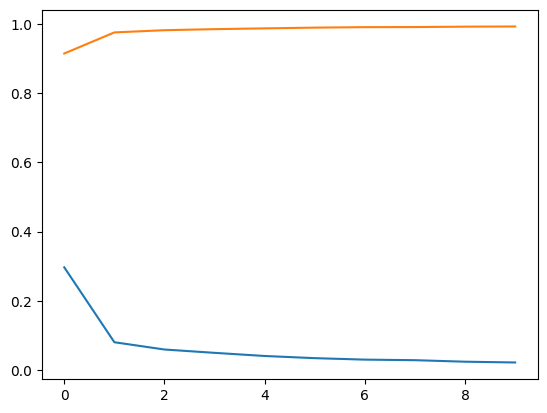

In [27]:
plt.plot(conv_history.history['loss'])
plt.plot(conv_history.history['accuracy'])

실습 2 : 위 학습 결과를 해석해보세요. 그리고 그 근거를 찾아보세요.
- 정확도가 향상되었다. 더 좋은 결과의 모델이다. 과소적합이다. 과대적합이다 등
- 더 좋은 결과의 모델이다.더 낮은 loss값, 더 높은 accuracy값을 가지기 때문이다.